In [2]:
# Proses data
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Evaluasi Model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
df=pd.read_csv("loan_clean.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


### Imbalance Problem

In [6]:
df["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

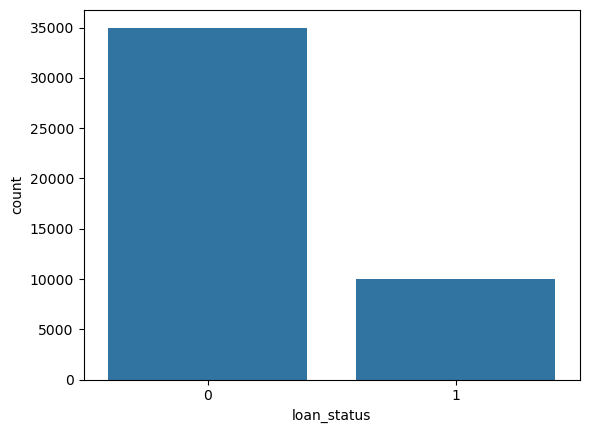

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data = df, x='loan_status')

### - Oversampling

In [10]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[df['loan_status']==0] 
df_minority = df[df['loan_status']==1]

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 35000, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
print(df_upsampled['loan_status'].value_counts())

loan_status
1    35000
0    35000
Name: count, dtype: int64


### - Undersampling

In [12]:
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 10000, # to match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
print(df_downsampled['loan_status'].value_counts())

loan_status
0    10000
1    10000
Name: count, dtype: int64


### Train Test Split

In [14]:
X = df_upsampled.drop(['loan_status'], axis=1)
y = df_upsampled['loan_status']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (56000, 13)
y train: (56000,)
X test: (14000, 13)
y test: (14000,)


### Model

### 1. Decision Tree

In [18]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_dtree = dtree.predict(X_test)

In [20]:
print("Confusion Matrix DT:\n",confusion_matrix(y_test, y_dtree))
print("Akurasi DT:",accuracy_score(y_test, y_dtree))
print("Precision DT:",precision_score(y_test, y_dtree, average='macro'))
print("Recall DT:",recall_score(y_test, y_dtree, average='macro'))

Confusion Matrix DT:
 [[6525  506]
 [  71 6898]]
Akurasi DT: 0.9587857142857142
Precision DT: 0.9604472317423687
Recall DT: 0.9589225107047508


In [22]:
feature_names = ['person_age', 'person_gender', 'person_education', 'person_income', 
                 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                 'credit_score', 'previous_loan_defaults_on_file']

# Data baru tanpa kolom target
data_baru = [
    [22.0, 0, 4, 71948.0, 0, 3, 35000.0, 4, 16.02, 0.49, 3.0, 561, 0],
    [35.0, 1, 2, 55000.0, 5, 1, 15000.0, 2, 13.5, 0.27, 6.0, 620, 0],
    [28.0, 0, 3, 30000.0, 2, 2, 8000.0, 3, 12.7, 0.26, 4.0, 610, 1],
    [45.0, 1, 1, 72000.0, 10, 3, 20000.0, 0, 14.1, 0.28, 10.0, 650, 0],
]

# Buat DataFrame
df_baru = pd.DataFrame(data_baru, columns=feature_names)

# Prediksi
preds = dtree.predict(df_baru)
print(preds)

[1 0 0 1]


### 2. Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100)

rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [26]:
print("Confusion Matrix RF:\n",confusion_matrix(y_test, y_rf))
print("Akurasi RF:",accuracy_score(y_test, y_rf))
print("Precision RF:",precision_score(y_test, y_rf, average='macro'))
print("Recall RF:",recall_score(y_test, y_rf, average='macro'))

Confusion Matrix RF:
 [[6005 1026]
 [ 661 6308]]
Akurasi RF: 0.8795
Precision RF: 0.880471855475703
Recall RF: 0.8796130981262714


In [28]:
feature_names = ['person_age', 'person_gender', 'person_education', 'person_income', 
                 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                 'credit_score', 'previous_loan_defaults_on_file']

# Data baru tanpa kolom target
data_baru = [
    [22.0, 0, 4, 71948.0, 0, 3, 35000.0, 4, 16.02, 0.49, 3.0, 561, 0],
    [35.0, 1, 2, 55000.0, 5, 1, 15000.0, 2, 13.5, 0.27, 6.0, 620, 0],
    [28.0, 0, 3, 30000.0, 2, 2, 8000.0, 3, 12.7, 0.26, 4.0, 610, 1],
    [45.0, 1, 1, 72000.0, 10, 3, 20000.0, 0, 14.1, 0.28, 10.0, 650, 0],
]

# Buat DataFrame
df_baru = pd.DataFrame(data_baru, columns=feature_names)

# Prediksi
preds = rf.predict(df_baru)
print(preds)

[1 1 0 1]
